

*   Load the data and libraries
*   Data visualization
*   Divide the data into x and y
*   Divide the data tinto train and test
*   Apply ml algorithm and evaluate
*   Single layer preceptron and evaluate
*   apply the multilayer precetron and evaluate
*   Implement Deep learning using keras and tensorflow










In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import Perceptron

In [ ]:
!unzip "/content/digit-recognizer.zip"

Archive:  /content/digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [ ]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [ ]:
features = ['pixel{}'.format(pixel_num) for pixel_num in range(1,784)] # Removed the parentheses within the string
row_to_examine = 0
image_data = np.reshape(train[features][row_to_examine:row_to_examine+1].to_numpy(), (28,28))
plt.imshow(image_data)

ValueError: cannot reshape array of size 783 into shape (28,28)

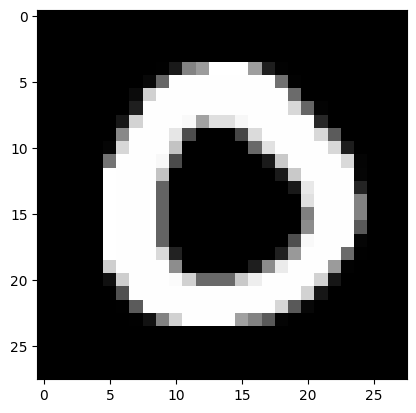

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


features = ['pixel{}'.format(pixel_num) for pixel_num in range(0, 784)]  # 0 to 783 to include pixel783
row_to_examine = 4

# Extract the image data for the specified row
image_data = np.reshape(train[features].iloc[row_to_examine].to_numpy(), (28, 28))

# Display the image
plt.imshow(image_data, cmap='gray')
plt.show()


In [ ]:
x = train.drop('label',axis=1)
y = train['label']

In [ ]:
x.shape

(42000, 784)

In [ ]:
y.shape

(42000,)

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(33600, 784)
(8400, 784)
(33600,)
(8400,)


# RandomForest

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)

RandomForestClassifier()

In [ ]:
x_train_predict = rfc.predict(xtrain)
x_test_predict = rfc.predict(xtest)

In [ ]:
training_data_accuracy = accuracy_score(ytrain,x_train_predict)
test_data_accuracy = accuracy_score(ytest,x_test_predict)

In [ ]:
print("Accuracy score of training data : ",training_data_accuracy)
print("Accuracy score of test data : ",round(test_data_accuracy,2))

Accuracy score of training data :  1.0
Accuracy score of test data :  0.96


# Gradient Boosting Classifier

In [ ]:
gbc  = GradientBoostingClassifier()
gbc.fit(xtrain,ytrain)

GradientBoostingClassifier()

In [ ]:
training_accuracy = gbc.predict(xtrain)
testing_accuracy = gbc.predict(xtest)
print("Accuracy score of training data : ",accuracy_score(training_accuracy,ytrain))
print("Accuracy score of test data : ",accuracy_score(testing_accuracy,ytest))

Accuracy score of training data :  0.9697619047619047
Accuracy score of test data :  0.9413095238095238


# Single Layer Perceptron

In [ ]:
per = Perceptron()
per.fit(xtrain,ytrain)

In [ ]:
y_train_predict = per.predict(xtrain)
y_test_predict = per.predict(xtest)

In [ ]:
print("trainig accuracy of perceptron model:",accuracy_score(ytrain,y_train_predict))
print("testing accuracy of perceptron model:",accuracy_score(ytest,y_test_predict))

trainig accuracy of perceptron model: 0.894077380952381
testing accuracy of perceptron model: 0.8739285714285714


# MLP Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes = (32,32,32),random_state=10,verbose=1)
mlp.fit(xtrain,ytrain)

Iteration 1, loss = 3.07234049
Iteration 2, loss = 0.88802568
Iteration 3, loss = 0.62619238
Iteration 4, loss = 0.47186181
Iteration 5, loss = 0.38150929
Iteration 6, loss = 0.32478025
Iteration 7, loss = 0.29208052
Iteration 8, loss = 0.26603890
Iteration 9, loss = 0.24581941
Iteration 10, loss = 0.22983025
Iteration 11, loss = 0.21569795
Iteration 12, loss = 0.20368834
Iteration 13, loss = 0.19198542
Iteration 14, loss = 0.18206145
Iteration 15, loss = 0.17531013
Iteration 16, loss = 0.16875916
Iteration 17, loss = 0.16756195
Iteration 18, loss = 0.15588688
Iteration 19, loss = 0.15135679
Iteration 20, loss = 0.14489728
Iteration 21, loss = 0.14366876
Iteration 22, loss = 0.13301529
Iteration 23, loss = 0.12994074
Iteration 24, loss = 0.13004373
Iteration 25, loss = 0.12470319
Iteration 26, loss = 0.12819240
Iteration 27, loss = 0.12158816
Iteration 28, loss = 0.11750855
Iteration 29, loss = 0.11939991
Iteration 30, loss = 0.11669315
Iteration 31, loss = 0.10861892
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(32, 32, 32), random_state=10, verbose=1)

In [ ]:
train_predict = mlp.predict(xtrain)
test_predicr =mlp.predict(xtest)

In [ ]:
print("training accuracy of mlp model is:",accuracy_score(ytrain,train_predict))
print('testing accuracy of mlp model is:', accuracy_score(ytest,test_predicr))

training accuracy of mlp model is: 0.991875
testing accuracy of mlp model is: 0.9428571428571428


In [ ]:
cf = confusion_matrix(ytest,test_predicr)
cr = classification_report(ytest,test_predicr)
print(cf)
print(cr)

[[795   0   4   2   4   1   4   1   5   0]
 [  0 901   3   0   1   1   0   0   3   0]
 [  3   7 791  19   8   0   3   7   6   2]
 [  1   3  12 855   1  22   1   8  19  15]
 [  2   1   9   2 772   4  11   3   5  30]
 [  3   1   3  14   3 658  11   1   7   1]
 [  7   2   2   1   4   8 757   0   4   0]
 [  0   4  11   2   8   3   0 848   1  16]
 [  1   8   3  14   9  13   4   1 773   9]
 [  2   4   0  16  15   7   0  19   5 770]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       816
           1       0.97      0.99      0.98       909
           2       0.94      0.93      0.94       846
           3       0.92      0.91      0.92       937
           4       0.94      0.92      0.93       839
           5       0.92      0.94      0.93       702
           6       0.96      0.96      0.96       785
           7       0.95      0.95      0.95       893
           8       0.93      0.93      0.93       835
           9       0.91     

In [ ]:
mlp1 = MLPClassifier(hidden_layer_sizes = (64,64,64),random_state=10,verbose=1)
mlp1.fit(xtrain,ytrain)

Iteration 1, loss = 2.85703105
Iteration 2, loss = 0.59856379
Iteration 3, loss = 0.38579358
Iteration 4, loss = 0.28418705
Iteration 5, loss = 0.22347476
Iteration 6, loss = 0.18504039
Iteration 7, loss = 0.15458007
Iteration 8, loss = 0.13554287
Iteration 9, loss = 0.11673962
Iteration 10, loss = 0.10693939
Iteration 11, loss = 0.09430352
Iteration 12, loss = 0.08802277
Iteration 13, loss = 0.07917654
Iteration 14, loss = 0.08144594
Iteration 15, loss = 0.07556030
Iteration 16, loss = 0.06924096
Iteration 17, loss = 0.08135622
Iteration 18, loss = 0.07454874
Iteration 19, loss = 0.05462696
Iteration 20, loss = 0.06274937
Iteration 21, loss = 0.06381694
Iteration 22, loss = 0.05689705
Iteration 23, loss = 0.05402825
Iteration 24, loss = 0.05599149
Iteration 25, loss = 0.06165696
Iteration 26, loss = 0.05828593
Iteration 27, loss = 0.05080132
Iteration 28, loss = 0.04187618
Iteration 29, loss = 0.04498966
Iteration 30, loss = 0.05269183
Iteration 31, loss = 0.04116215
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(64, 64, 64), random_state=10, verbose=1)

In [ ]:
train_predict1 = mlp1.predict(xtrain)
test_predict1 =mlp1.predict(xtest)

In [ ]:
print("training accuracy of mlp model is:",round(accuracy_score(ytrain,train_predict1),2))
print('testing accuracy of mlp model is:', round(accuracy_score(ytest,test_predict1),2))

training accuracy of mlp model is: 0.99
testing accuracy of mlp model is: 0.96


# Approach for keras and tesnsorflow



*   Load the data and libraries
*   Declare the model
       
       * Sequential : sequence of layers  
       * Functional : Multi Modal / Transfer learning

*   Declare the layers
*   Dense, Dropout

*   Number of neurons , Act Function
*   Compile the model
      
      * Optimizer (SGD, Adam)
      * Loss Function (cross entropy, MSE, RMSE)
      * Metrics ( Accuracy, F1, Precison, Recall)

*   Fit the Model





*   
*  













In [ ]:
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical

In [ ]:
ytrain_one = to_categorical(ytrain)
ytest_one = to_categorical(ytest)

In [ ]:
print(ytrain)

34941    6
24433    5
24432    3
8832     4
30291    7
        ..
6265     9
11284    9
38158    2
860      6
15795    0
Name: label, Length: 33600, dtype: int64


In [ ]:
print(ytrain_one)
print(ytest_one)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
model = Sequential()
model.add(Dense(256,activation='relu',input_shape=(784,))) # Layer1 and input layer
model.add(Dropout(0.2)) # drop 20% of neurons and generally dont go above 40% and after every layer it should be dropped
model.add(Dense(256,activation='relu')) # layer2 hiden layer
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu')) #layer3 hidden layer
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax')) # output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 335,114 (1.28 MB)

 Trainable params: 335,114 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
hist = model.fit(xtrain,ytrain_one,batch_size=128,epochs=100,validation_data=(xtest,ytest_one))

Epoch 1/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.6121 - loss: 12.4950 - val_accuracy: 0.8917 - val_loss: 0.4001
Epoch 2/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8286 - loss: 0.6963 - val_accuracy: 0.9217 - val_loss: 0.2930
Epoch 3/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.8825 - loss: 0.4218 - val_accuracy: 0.9308 - val_loss: 0.2478
Epoch 4/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9084 - loss: 0.3265 - val_accuracy: 0.9414 - val_loss: 0.2173
Epoch 5/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9286 - loss: 0.2595 - val_accuracy: 0.9454 - val_loss: 0.1988
Epoch 6/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9273 - loss: 0.2526 - val_accuracy: 0.9496 - val_loss: 0.1771
Epoch 7/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9375 - loss: 0.2182 - val_accuracy: 0.9505 - val_loss: 0.1721
Epoch 8/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9441 - loss: 0.1953 -

In [ ]:
hist.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
hist.history['accuracy']

[0.7179166674613953,
 0.8478273749351501,
 0.8896428346633911,
 0.9107440710067749,
 0.9274404644966125,
 0.9332143068313599,
 0.9384226202964783,
 0.9460416436195374,
 0.9505357146263123,
 0.9534226059913635,
 0.9574999809265137,
 0.9589583277702332,
 0.9605059623718262,
 0.9616071581840515,
 0.963065505027771,
 0.9633333086967468,
 0.965416669845581,
 0.9672916531562805,
 0.9679762125015259,
 0.9680356979370117,
 0.9700297713279724,
 0.9727678298950195,
 0.9714285731315613,
 0.9719047546386719,
 0.9724107384681702,
 0.9742559790611267,
 0.9740476012229919,
 0.9770833253860474,
 0.9744642972946167,
 0.975386917591095,
 0.9776785969734192,
 0.977529764175415,
 0.9776190519332886,
 0.9776785969734192,
 0.9772321581840515,
 0.9781845211982727,
 0.9775893092155457,
 0.9800893068313599,
 0.9798511862754822,
 0.9816368818283081,
 0.9813988208770752,
 0.9818154573440552,
 0.980654776096344,
 0.9816368818283081,
 0.9820535778999329,
 0.9833928346633911,
 0.9846726059913635,
 0.983065485954284

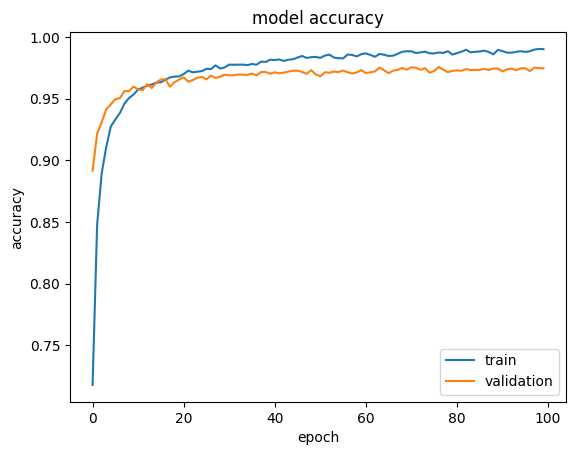

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='lower right')

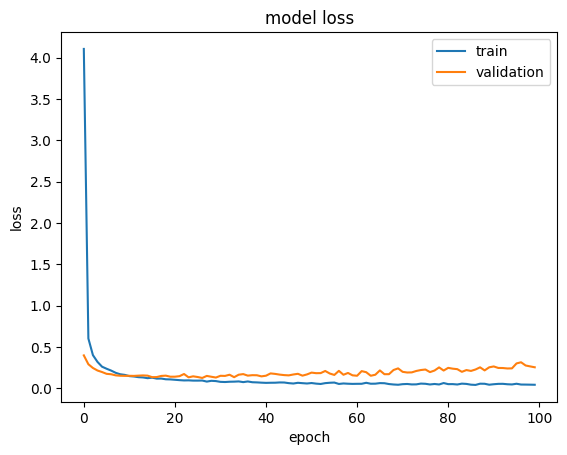

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper right')

# Model Evaluation

In [ ]:
y_hat_train_dense = np.argmax(model.predict(xtrain),axis=1)
y_hat_test_dense = np.argmax(model.predict(xtest),axis=1)

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
y_hat_test_dense

array([8, 1, 9, ..., 3, 0, 9])

In [ ]:
cf2 = confusion_matrix(ytrain,y_hat_train_dense)
cr2 = classification_report(ytrain,y_hat_train_dense)
print(cf2)
print(cr2)

[[3308    0    0    0    0    0    0    0    7    1]
 [   0 3773    0    0    0    0    0    0    2    0]
 [   1    0 3329    0    0    0    0    0    1    0]
 [   0    1    3 3398    0    1    0    0    2    9]
 [   2    0    1    0 3225    0    0    0    2    3]
 [   0    0    0    0    0 3081    4    0    2    6]
 [   2    2    0    0    0    0 3346    0    2    0]
 [   0    0    1    0    0    0    0 3507    0    0]
 [   2    1    0    0    0    1    0    0 3223    1]
 [   0    0    0    0    1    0    0    1    4 3344]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3316
           1       1.00      1.00      1.00      3775
           2       1.00      1.00      1.00      3331
           3       1.00      1.00      1.00      3414
           4       1.00      1.00      1.00      3233
           5       1.00      1.00      1.00      3093
           6       1.00      1.00      1.00      3352
           7       1.00      1.00   

In [ ]:
cf1 = confusion_matrix(ytest,y_hat_test_dense)
cr1 = classification_report(ytest,y_hat_test_dense)
print(cf1)
print(cr1)

[[806   0   2   0   0   0   3   2   3   0]
 [  0 904   2   0   1   0   0   1   1   0]
 [  4   5 819   4   3   2   0   1   7   1]
 [  1   2   5 906   0   9   0   4   5   5]
 [  1   0   0   0 808   0   5   2   3  20]
 [  1   1   0   5   1 679   6   1   3   5]
 [  4   2   0   0   0   0 774   0   5   0]
 [  0   2   8   1   2   0   0 875   0   5]
 [  2   5   4   7   3   4   4   2 802   2]
 [  1   0   0   2   3   3   0  10   5 814]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       816
           1       0.98      0.99      0.99       909
           2       0.97      0.97      0.97       846
           3       0.98      0.97      0.97       937
           4       0.98      0.96      0.97       839
           5       0.97      0.97      0.97       702
           6       0.98      0.99      0.98       785
           7       0.97      0.98      0.98       893
           8       0.96      0.96      0.96       835
           9       0.96     

fashion mnist dataset analysis